In [33]:
import tensorflow as tf
print(tf.__version__)

2.2.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [7]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabaties_dataset = load_diabetes()
print(diabaties_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [8]:
diabaties_dataset.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [9]:
# Save the input and target variables
data = diabaties_dataset['data']
target = diabaties_dataset['target']


In [10]:
import numpy as np
# Normalise the target data (this will make clearer training curves)
target = (target - np.mean(target))/np.std(target)
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [11]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(data,target,test_size=0.1 )
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(397, 10)
(397,)
(45, 10)
(45,)


#### Train a feedforward neural network model

In [12]:
X_train.shape[1]

10

In [13]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(1,activation='linear')
    ])
    return model
model = get_model()

In [14]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [15]:
# Compile the model

model.compile(optimizer='adam',loss='mse', metrics=['mae'])

In [16]:
# Train the model, with some of the data reserved for validation
history = model.fit(X_train,Y_train,validation_split=0.15,epochs=100,verbose=2,batch_size=64)


Epoch 1/100
6/6 - 0s - loss: 0.9815 - mae: 0.8377 - val_loss: 0.9218 - val_mae: 0.8655
Epoch 2/100
6/6 - 0s - loss: 0.9161 - mae: 0.8079 - val_loss: 0.8137 - val_mae: 0.8072
Epoch 3/100
6/6 - 0s - loss: 0.7508 - mae: 0.7261 - val_loss: 0.6403 - val_mae: 0.6581
Epoch 4/100
6/6 - 0s - loss: 0.6215 - mae: 0.6411 - val_loss: 0.4621 - val_mae: 0.5460
Epoch 5/100
6/6 - 0s - loss: 0.5172 - mae: 0.5864 - val_loss: 0.5444 - val_mae: 0.5763
Epoch 6/100
6/6 - 0s - loss: 0.4850 - mae: 0.5660 - val_loss: 0.6479 - val_mae: 0.6187
Epoch 7/100
6/6 - 0s - loss: 0.4981 - mae: 0.5596 - val_loss: 0.5200 - val_mae: 0.5636
Epoch 8/100
6/6 - 0s - loss: 0.4981 - mae: 0.5552 - val_loss: 0.5317 - val_mae: 0.5631
Epoch 9/100
6/6 - 0s - loss: 0.4718 - mae: 0.5599 - val_loss: 0.5563 - val_mae: 0.5770
Epoch 10/100
6/6 - 0s - loss: 0.4533 - mae: 0.5430 - val_loss: 0.5242 - val_mae: 0.5625
Epoch 11/100
6/6 - 0s - loss: 0.4476 - mae: 0.5336 - val_loss: 0.5310 - val_mae: 0.5663
Epoch 12/100
6/6 - 0s - loss: 0.4289 - ma

In [17]:
# Evaluate the model on the test set
loss,mae = model.evaluate(X_test,Y_test)


2/2 [==============================] - 0s 1ms/step - loss: 0.8045 - mae: 0.7460


#### Plot the learning curves

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

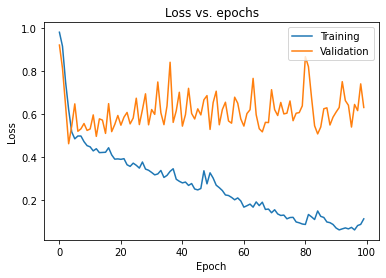

In [19]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [20]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [21]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd), input_shape=(X_train.shape[1],)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [22]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(0.01,0.05)

In [23]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [24]:
# Train the model, with some of the data reserved for validation

history = model.fit(X_train, Y_train, validation_split=0.20, epochs=100, batch_size=2**7, verbose=False )

In [25]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test,Y_test, verbose=2)


2/2 - 0s - loss: 0.6203 - mae: 0.5403


#### Plot the learning curves

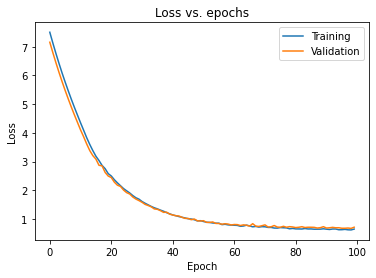

In [26]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [27]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback



class myCustomTrainingCallBack(Callback):
    
    def on_train_begin(self, logs= None):
        print("Training Begin!! ")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training Batch {batch} Begin")
    
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training Batch {batch} Ended")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Epoch #{epoch} Begin" )
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch #{epoch} End")
        
    def on_train_end(self,logs=None):
        print("Training Ended")
        
        
class myCustomTestingCallBack(Callback):
    
    def on_test_begin(self, logs= None):
        print("Testing Begin!! ")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing Batch {batch} Begin")
    
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing Batch {batch} Ended")
        
        
    def on_test_end(self,logs=None):
        print("Testing Ended")
        

class myCustomPredictionCallBack(Callback):
    
    def on_predict_begin(self, logs= None):
        print("Prediction Begin!! ")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction Batch {batch} Begin")
    
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Predicton Batch {batch} Ended")
        
        
    def on_predict_end(self,logs=None):
        print("Precition Ended")

In [28]:
# Re-build the model

model = get_regularised_model(1e-5, 0.3)


In [29]:
# Compile the model
model.compile(optimizer='Adam', loss='mse')

#### Train the model with the callback

In [30]:
# Train the model, with some of the data reserved for validation

history = model.fit(X_train,Y_train, epochs=5, batch_size=128, validation_split=0.1, callbacks=[myCustomTrainingCallBack()], verbose=0)

Training Begin!! 
Epoch #0 Begin
Training Batch 0 Begin
Training Batch 0 Ended
Training Batch 1 Begin
Training Batch 1 Ended
Training Batch 2 Begin
Training Batch 2 Ended
Epoch #0 End
Epoch #1 Begin
Training Batch 0 Begin
Training Batch 0 Ended
Training Batch 1 Begin
Training Batch 1 Ended
Training Batch 2 Begin
Training Batch 2 Ended
Epoch #1 End
Epoch #2 Begin
Training Batch 0 Begin
Training Batch 0 Ended
Training Batch 1 Begin
Training Batch 1 Ended
Training Batch 2 Begin
Training Batch 2 Ended
Epoch #2 End
Epoch #3 Begin
Training Batch 0 Begin
Training Batch 0 Ended
Training Batch 1 Begin
Training Batch 1 Ended
Training Batch 2 Begin
Training Batch 2 Ended
Epoch #3 End
Epoch #4 Begin
Training Batch 0 Begin
Training Batch 0 Ended
Training Batch 1 Begin
Training Batch 1 Ended
Training Batch 2 Begin
Training Batch 2 Ended
Epoch #4 End
Training Ended


In [16]:
# Evaluate the model

model.evaluate(X_test, Y_test, verbose=False, callbacks=[myCustomTestingCallBack()] )

Testing Begin!! 
Testing Batch 0 Begin
Testing Batch 0 Ended
Testing Batch 1 Begin
Testing Batch 1 Ended
Testing Ended


0.5591641068458557

In [31]:
# Make predictions with the model

model.predict(X_test, verbose=False, callbacks=[myCustomPredictionCallBack()])

Prediction Begin!! 
Prediction Batch 0 Begin
Predicton Batch 0 Ended
Prediction Batch 1 Begin
Predicton Batch 1 Ended
Precition Ended


array([[ 0.2593555 ],
       [ 0.34315282],
       [-0.04131971],
       [-0.1120209 ],
       [ 0.07336584],
       [-0.1081825 ],
       [-0.02549986],
       [ 0.17897516],
       [ 0.25298843],
       [ 0.114225  ],
       [ 0.17478858],
       [ 0.3694718 ],
       [ 0.48071238],
       [ 0.18180662],
       [ 0.07610504],
       [-0.1125576 ],
       [ 0.20069695],
       [ 0.3168754 ],
       [-0.05395791],
       [ 0.21074775],
       [ 0.12429862],
       [-0.06843936],
       [-0.1137156 ],
       [ 0.27318305],
       [-0.03819892],
       [ 0.10152555],
       [-0.09778501],
       [ 0.3546997 ],
       [ 0.12296857],
       [ 0.25381246],
       [ 0.23593335],
       [-0.10804111],
       [ 0.3453573 ],
       [-0.10956328],
       [ 0.34214583],
       [ 0.24553654],
       [ 0.33257064],
       [ 0.14278589],
       [ 0.12043019],
       [ 0.2845433 ],
       [-0.11169586],
       [ 0.29499817],
       [ 0.37705395],
       [-0.10043172],
       [ 0.2909243 ]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [45]:
# Re-train the unregularised model
unreg_model = get_model()
unreg_model.compile(optimizer='adam', loss='mse')
unreg_hist = unreg_model.fit(X_train,Y_train, epochs=100,
                             verbose=False,validation_split=0.2,
                             callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)] )


In [46]:
# Evaluate the model on the test set
unreg_model.evaluate(X_test, Y_test)


2/2 [==============================] - 0s 2ms/step - loss: 0.4073


0.4072655439376831

In [47]:
# Re-train the regularised model
regularized_model = get_regularised_model(1e-8,0.01)
regularized_model.compile(optimizer='adam', loss='mse')
regularized_hist = regularized_model.fit(X_train,Y_train, epochs=100,
                                         verbose=False,validation_split=0.2,
                                         callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)] )


In [48]:
# Evaluate the model on the test set

regularized_model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 998us/step - loss: 0.4059


0.40586960315704346

#### Plot the learning curves

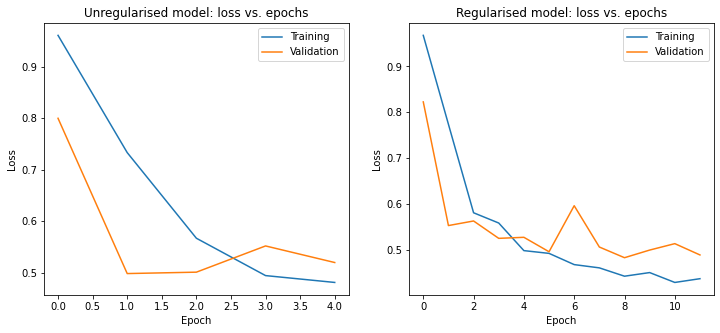

In [49]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_hist.history['loss'])
plt.plot(unreg_hist.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(regularized_hist.history['loss'])
plt.plot(regularized_hist.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()